In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
%matplotlib inline

# heatmap
matplotlib.axes.Axes.pcolormesh()：绘制网格图

> 根据栅格颜色确定label颜色

In [1]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    img = ax.pcolormesh(values, cmap=cmap, vmin=vmin, vmax=vmax)  #创建伪彩色图
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)   #the ratio of y-unit to x-unit

    """
    根据格子颜色，改变anno的颜色
    get_paths()获得栅格角坐标
    get_facecolors()获得颜色
    get_array()获得对应值
    """
    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)    #前四个坐标为四个边角的坐标，后两个是左下角坐标
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

(4.3, 7.9)

(1.0, 6.9)

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'petal length (cm)')

Text(0.5, 1.0, 'Target')

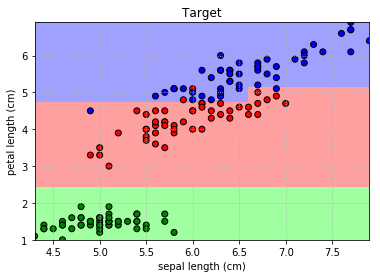

In [5]:
iris = datasets.load_iris()
data = pd.DataFrame(iris["data"],columns=iris["feature_names"])

x_train = data[["sepal length (cm)","petal length (cm)"]]
y_train = iris["target"]

model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
model.fit(x_train, y_train)
 
N, M = 500, 500  # 横纵各采样多少个值
x1_min, x2_min = x_train.min(axis=0)
x1_max, x2_max = x_train.max(axis=0)
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
y_predict=model.predict(x_show)

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.pcolormesh(x1, x2, y_predict.reshape(x1.shape), cmap=cm_light)
plt.scatter(x_train["sepal length (cm)"],x_train["petal length (cm)"],c=y_train,cmap=cm_dark,marker='o',edgecolors='k')
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Target")
plt.grid(True,ls=':')

[Text(0, 0, '0'), Text(0, 0, '0.5'), Text(0, 0, '1')]

[]

[]

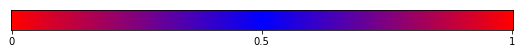

In [3]:
# Create custom colormaps
cdict = {'red': ((0.0, 1.0, 1.0),   # Full red at the first stop
                 (0.5, 0.0, 0.0),   # No red at second stop
                 (1.0, 1.0, 1.0)),  # Full red at final stop
        #
        'green': ((0.0, 0.0, 0.0),  # No green at all stop
                 (0.5, 0.0, 0.0),   # 
                 (1.0, 0.0, 0.0)),  # 
        #
        'blue': ((0.0, 0.0, 0.0),   # No blue at first stop
                 (0.5, 1.0, 1.0),   # Full blue at second stop
                 (1.0, 0.0, 0.0))}  # No blue at final stop

cmap = LinearSegmentedColormap('Rd_Bl_Rd', cdict, 256)
im = np.outer(np.ones(10), np.linspace(0, 255, 256))
fig = plt.figure(figsize=(9, 2))
ax = fig.add_subplot('111')
ax.set_xticks(np.linspace(0, 255, 3))
ax.set_xticklabels([0, 0.5, 1])
ax.set_yticks([])
ax.set_yticklabels([])
ax.imshow(im, interpolation='nearest', cmap=cmap)

plt.show()

# scatter
> 利用plot逐一添加点

In [4]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):

    #对于缺少参数的处理
    if ax is None:
        ax = plt.gca()

    if y is None:    #未指定分类
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:    #未指定marker
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] 

    if len(markers) == 1:   #只指定了1个marker
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']    #更改默认属性中的颜色循环

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy      #mask = (y == yy)    y为array，所以返回Boolean array
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor))

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

# colorbar
模仿pheatmap
> z_score处理后，强制利用vmax=3和vmin=-3处理掉其它值

> 利用np.where或者df.where确定阈值

(0, 49)

(0, 98)

Text(0.5, 1.0, 'Line Collection with mapped colors')

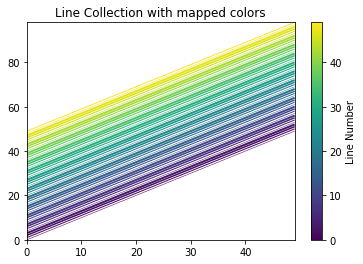

In [7]:
N = 50
x = np.arange(N)
ys = [x + i for i in x]

fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

line_segments = LineCollection([np.column_stack([x, y]) for y in ys],
                               linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
line_segments.set_array(x)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
plt.sci(line_segments)  
plt.show()